<a href="https://colab.research.google.com/github/danunter/hw/blob/main/hw5_cats%26dags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
_URL= 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


at this folder: '/content/drive/MyDrive/AI_course/hw5/cats_and_dogs_filtered/cats_and_dogs_filtered' there are 2 folders: train and validation, each contains dog folder with dors images, and cats folder with cats images. this is the dataset you use. write a code that create a cnn NN that classifies image to cat or dog, the input image from need to be resize to 150X150 and stay  RGB. create fit function to train the NN with epoch=10, batch=100, learning rate= 0.0001. display graph of accuracy and graph of loss. create and display a confusion matrix  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Path to the dataset
dataset_path = '/content/drive/MyDrive/AI_course/hw5/cats_and_dogs_filtered/cats_and_dogs_filtered'

# Define image size
img_size = (150, 150)



# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Define batch size and learning rate
batch_size = 100
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    dataset_path + '/validation',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 949 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 568s 28s/step - loss: 0.7312 - accuracy: 0.5095 - val_loss: 0.6999 - val_accuracy: 0.4789
Epoch 2/10
20/20 [==============================] - 9s 436ms/step - loss: 0.6893 - accuracy: 0.5230 - val_loss: 0.6832 - val_accuracy: 0.6311
Epoch 3/10
20/20 [==============================] - 9s 473ms/step - loss: 0.6774 - accuracy: 0.5690 - val_loss: 0.6695 - val_accuracy: 0.5567
Epoch 4/10
20/20 [==============================] - 11s 562ms/step - loss: 0.6577 - accuracy: 0.5955 - val_loss: 0.6619 - val_accuracy: 0.5411
Epoch 5/10
20/20 [==============================] - 10s 482ms/step - loss: 0.6329 - accuracy: 0.6465 - val_loss: 0.6218 - val_accuracy: 0.6911
Epoch 6/10
20/20 [==============================] - 11s 545ms/step - loss: 0.5943 - accuracy: 0.6965 - val_loss: 0.5968 - val_accuracy: 0.7089
Epoch 7/10
20/20 [==============================] - 8s 420ms/s

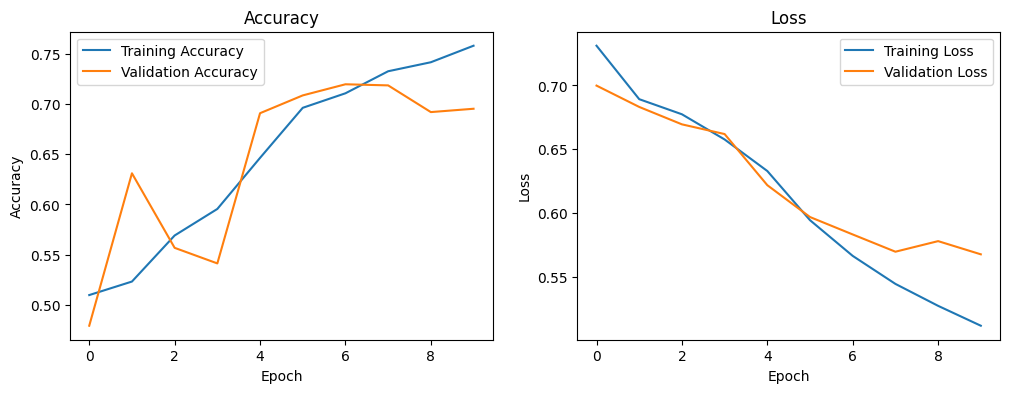

10/10 [==============================] - 3s 301ms/step
Confusion Matrix:
[[221 279]
 [190 259]]
Classification Report:
              precision    recall  f1-score   support

        cats       0.54      0.44      0.49       500
        dogs       0.48      0.58      0.52       449

    accuracy                           0.51       949
   macro avg       0.51      0.51      0.51       949
weighted avg       0.51      0.51      0.50       949



In [1]:

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Display graphs of accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Generate predictions
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.round(y_pred)

# Create and display confusion matrix
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
class_labels = list(validation_generator.class_indices.keys())
class_report = classification_report(validation_generator.classes, y_pred, target_names=class_labels)
print("Classification Report:")
print(class_report)


1/1 [==============================] - 0s 77ms/step


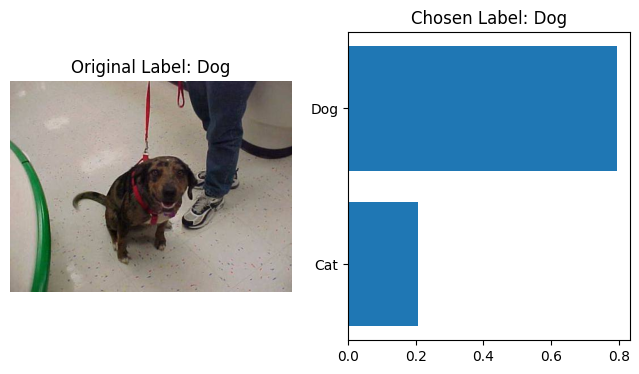

In [18]:
import random
from tensorflow.keras.preprocessing import image
import cv2

# Function to load and preprocess an image
def load_and_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array

# Choose a random image from the validation set
random_index = random.randint(0, len(validation_generator.filenames) - 1)
random_image_path = validation_generator.filepaths[random_index]
random_label = validation_generator.classes[random_index]

# Load and preprocess the random image
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR, convert to RGB
img_array = load_and_preprocess_image(random_image_path)

# Forward pass through the model
prediction = model.predict(img_array)[0, 0]  # Extract scalar value from the array
chosen_label = "Dog" if prediction > 0.5 else "Cat"
original_label = "Dog" if random_label == 1 else "Cat"

# Display the image with the chosen classification
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Original Label: {original_label}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.barh(['Cat', 'Dog'], [1 - prediction, prediction])
plt.title(f"Chosen Label: {chosen_label}")
plt.show()
